PREDICTING TELCOM CUSTOMERS CHURN

1. Defining the question

a) Specifying the Data Analytic Question

The solution will seek to establish customer churn for Telco. The predction will be based on Telco data and wil also give in depth insights into some of the key demographic factors that might drive individuals agreeing to churn.

b) The Metric for Success

We aim to establish the factors that detemine the factors that determine whether an individual will churn or not. We will also make reccomendations to Telsos on ways they can use to ensure that they reach more people and increase their chances of getting positive response in effort to turn customers.

c) The Experimental Design
 Below are the steps taken in this analysis
 1. loading the required libraries
 2. Loading and previewing data
 3. Cleaning the data
 4. Univariate analysis
 5. Bivariate analysis
 6. Multivariate analysis
 7. Implementing the solution by using the neccesary analysis(XGBoost)
 8. Challenging the solution and giving insights on how improvements can be made.

d) Data Relevance and Validation 

The data available is relevant for the intended analysis. It contains demographic information that is significant to determine customer churn for Telcos.
The data will help us in answering the data analytic question on the demographic factors that affect customer churn for Telcos. The data will also enable predicting the customer churn. 

e) Understanding the context 

The data set we are to work with contains the following columns:

 i. Customer ID:Customer ID 

 ii. Gender: Whether the customer is a male or a female 

 iii. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) 

 iv. Partner: Whether the customer has a partner or not (Yes, No) 

 v. Dependents: Whether the customer has dependents or not (Yes, No) 

 vi. Tenure: Number of months the customer has stayed with the company 

 vii. PhoneService: Whether the customer has a phone service or not (Yes, No) 

 viii. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service) 

 ix. InternetService: Customer’s internet service provider (DSL, Fiber optic, No) 

 x. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service) 

 xi. OnlineBackup : Whether the customer has online backup (Yes, No, No Internet service) 

 xii. DeviceProtection : Whether the customer has device protection (Yes, No, No Internet service) 

 xiii. TechSupport : Whether the customer receives technical support (Yes, No, No Internet service) 

 xiv. StreamingTV : Whether the customer has streaming TV (Yes, No, no Internet service) (The customer has a third-party indicates whether the provider uses the Internet service to broadcast television programs) 

 xv. StreamingMovies : Whether the customer has streaming movies (Yes, No, No Internet service) (Customer has a third-party Indicates whether the customer is using the Internet service to stream movies from the provider) 

 xvi. Contract : Duration of the customer's contract (Month to month, One year, Two years) 

 xvii. PaperlessBilling : Whether the customer has a paperless bill (Yes, No) 

 xix. PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic) 

 xx. MonthlyCharges : Amount charged to the customer monthly 

 xxi. TotalCharges : Total amount charged to the customer 

 xxii. Churn : Whether the customer is using or not (Yes or No) - Customers who left in the last month or quarter.
 

Each row represents a unique customer. The variables contain differetn information about the customers' service, account and demographic data.

Services that customers sign up for include phone, diffferent lines, internet, online security, online backup, device protection, technical support and movies streaming. Customer account information include duration they have been a customer, contract, payment method, paperless billing, monthly charges and and total charges. Demographic information about clients include the gender, age range, partners and dependents.

Telco customer churn contains information about a fictitious telecom company providing home phone and Internet services to 7043 customers in California in the third quarter. It includes which customers left, stayed or signed up for service.

The data set consists of 21 Variables and 7043 Observations.

**1. Reading the data**

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
dataset='/home/sammy/Documents/Lux-Dev_Projects/Telco-Customer-Churn.csv'

df=pd.read_csv(dataset)


In [3]:
#Previewing the first five rows of the dataframe
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#Checking on the details of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Shape
print(f"This datafame has:{df.shape[0]} rows,  and {df.shape[1]} columns")

This datafame has:7043 rows,  and 21 columns


In [7]:
#Summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#Correlation matrix
df.corr()

/tmp/ipykernel_5466/1994447648.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [9]:
#checking for the unique values in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
#Displaying the columns in the dataframe
columns=df.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#displaying all the unique values for each column
columns_tocheck=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for column_name in columns_tocheck:
    print(f"The unique value in{column_name} column is {df[column_name].unique()}")


The unique value incustomerID column is ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
The unique value ingender column is ['Female' 'Male']
The unique value inSeniorCitizen column is [0 1]
The unique value inPartner column is ['Yes' 'No']
The unique value inDependents column is ['No' 'Yes']
The unique value intenure column is [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
The unique value inPhoneService column is ['No' 'Yes']
The unique value inMultipleLines column is ['No phone service' 'No' 'Yes']
The unique value inInternetService column is ['DSL' 'Fiber optic' 'No']
The unique value inOnlineSecurity column is ['No' 'Yes' 'No internet service']
The unique value inOnlineBackup column is ['Yes' 'No' 'No internet service']
The unique value inDeviceProtection column is ['No'

**3. Data Cleaning**

In [17]:
#Checking for null values

print(f"There are {df.isnull().sum().sum()} null values in the dataset")

There are 0 null values in the dataset


In [12]:
#Displaying the columns
columns=df.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We see the column names are not correcly written and lack consistency

In [13]:
#Correcting the column names
def correct_names(columns):
    columns=columns.replace(" ", "_")
    columns=columns.lower()
    return columns
    
df.columns=df.columns.map(correct_names) 

cols=df.columns
print(cols)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [14]:
# Previewing the total charges column values
totalcharges = df['totalcharges']

totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [15]:
# Changing the data type of total charges column 

# Replace non-numeric values with 0
df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce").fillna(0)

df["totalcharges"].astype("float64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [18]:
#Checking  for outliers in the numerical columns
outliers = []

def detect_outlier(df):
  threshold=3
  mean_1=np.mean(df)
  std_1=np.std(df)

  for y in df:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers

print(f"Tenure; {detect_outlier(df['tenure'])}")
print(f"Monthly Charges; {detect_outlier(df['monthlycharges'])}")
print(f"Total Charges; {detect_outlier(df['totalcharges'])}")


Tenure; []
Monthly Charges; []
Total Charges; []


**4. Exploratory Data Analysis**

In [16]:
plt.barplot(df['Churn'].value_counts())
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

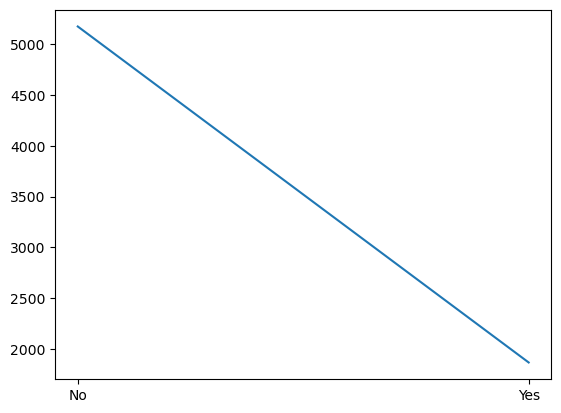